In [8]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("Data Science Salaries.csv")
df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


In [10]:
df = df.rename(
    columns={
        'job_title': 'Job Title',
        'experience_level': 'Experience Level',
        'employment_type': 'Employment Type',
        'work_models': 'Work Models',
        'work_year': 'Work Year',
        'employee_residence': 'Employee Residence',
        'salary': 'Salary',
        'salary_currency': 'Salary Currency',
        'salary_in_usd': 'Salary in USD',
        'company_location': 'Company Location',
        'company_size': 'Company Size'
    }
)

In [11]:
df.columns

Index(['Job Title', 'Experience Level', 'Employment Type', 'Work Models',
       'Work Year', 'Employee Residence', 'Salary', 'Salary Currency',
       'Salary in USD', 'Company Location', 'Company Size'],
      dtype='object')

In [12]:
df['Experience Level'].unique()

array(['Mid-level', 'Senior-level', 'Entry-level', 'Executive-level'],
      dtype=object)

<Axes: title={'center': 'Average Salary By Experience'}, xlabel='Experience Level'>

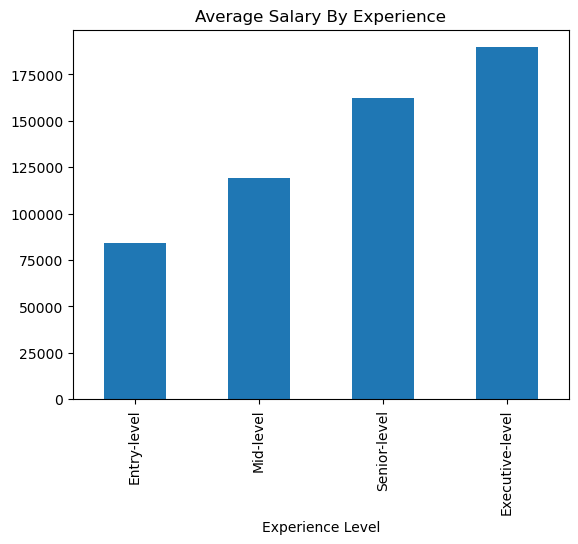

In [13]:
#Plot the income to the experience level
income_experience_df = df.groupby('Experience Level')['Salary in USD'].mean().sort_values()
income_experience_df.plot(kind='bar', title='average salary by experience'.title())

We discovered Salary increased when Experience Level improved. The difference between experience level is not equal. The largest gap appears to be between Mid-level and Senior-level. The least average salary difference is between Senior-level and Executive-level. This visual uses all the locations and residences, and although most of the data is for United States' residences and company locations, there is a wide variety of places used that skew the data. For instance, there is an Executive-level Full-time Staff Data Analyst On-site in Nigeria at a Medium-sized Canadian company and making $15,000 (USD). There are opportunities to specify further to understand where the other difference patterns are between Experience Level. I wonder which other Experience Level has data that skews it.

['0', '50000', '100000', '150000', '200000', '250000', '300000']


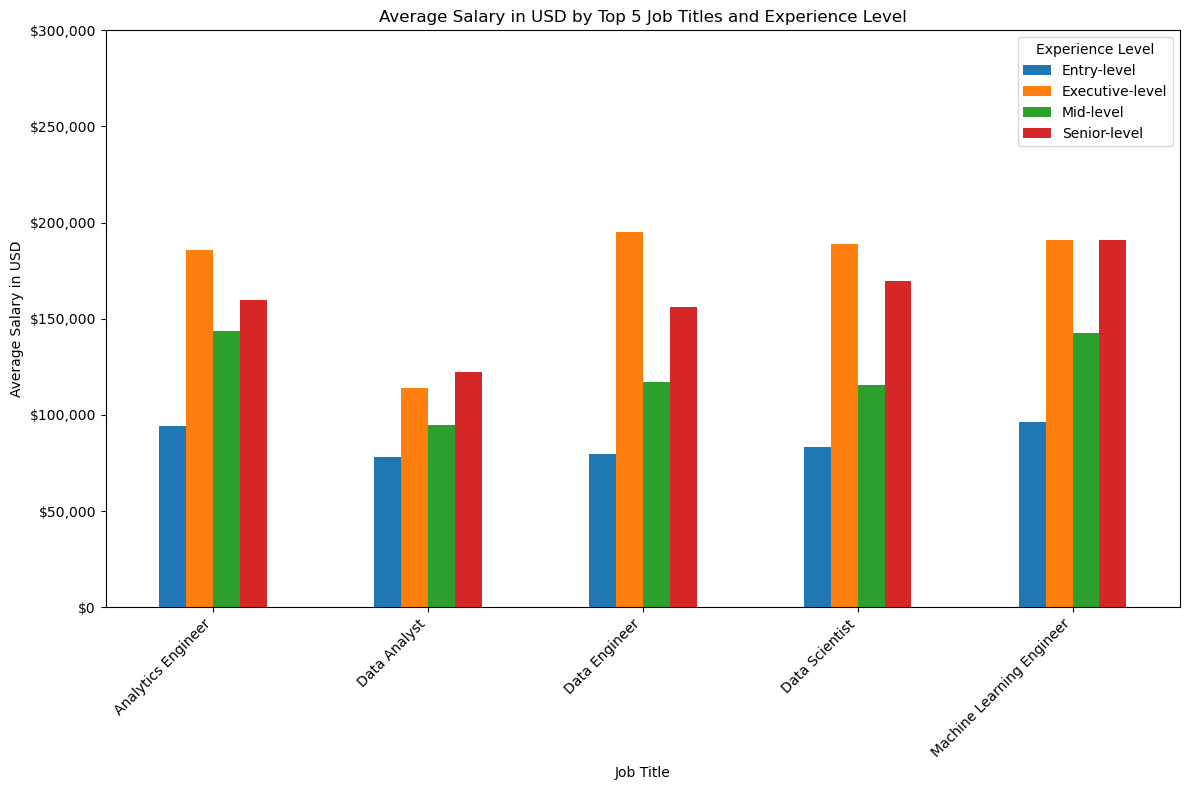

In [14]:
top_5_job_titles = df['Job Title'].value_counts().head(5).index
top_5_df = df[df['Job Title'].isin(top_5_job_titles)]


top_5_salaries_experience = top_5_df.groupby(['Job Title', 'Experience Level'])['Salary in USD'].mean().sort_values().unstack()
fig,ax = plt.subplots()
top_5_salaries_experience.plot(kind='bar', figsize=(12, 8), ax=ax)

ax.set_title('Average Salary in USD by Top 5 Job Titles and Experience Level')
ax.set_ylabel('Average Salary in USD')
ax.set_xlabel('Job Title')
ax.set_ylim(0, 300000)
ax.set_xticks(ticks=ax.get_xticks(), labels= ax.get_xticklabels(), rotation=45, ha='right')
labels = [item.get_text() for item in ax.get_yticklabels()]
print(labels)
labels = [f'${float(label):,g}' for label in labels]

ax.set_yticks(ticks=ax.get_yticks(),labels=labels)


ax.legend(title='Experience Level')
plt.tight_layout()
plt.show()

In the visual we show the average salary in dollars by experience level for the top 5 job titles used in the data set. We discover Data Analysts are paid the least amount on average for all experience levels. Machine Learning Engineers are paid the most at all levels except Executive-level. Data Engineers are paid the most at the Executive-level. This data includes employees from all over the world, when the currency is in United States Dollars. Wages vary for employees outside the United States. 

In [15]:
df.groupby('Experience Level')['Salary in USD'].describe()

,count,mean,std,min,25%,50%,75%,max
Experience Level,,,,,,,,
Entry-level,565.0,84448.916814,48758.315152,15000.0,49646.0,75000.0,110000.0,350000.0
Executive-level,254.0,189687.346457,71571.166828,15000.0,136000.0,184560.0,230000.0,465000.0
Mid-level,1675.0,119019.812537,71783.359309,15000.0,73523.0,106500.0,150000.0,750000.0
Senior-level,4105.0,162071.063581,64444.875091,15809.0,118000.0,153600.0,199200.0,750000.0


C:\Users\selle\AppData\Local\Temp\ipykernel_27708\2412694256.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(formatted_y_ticks)


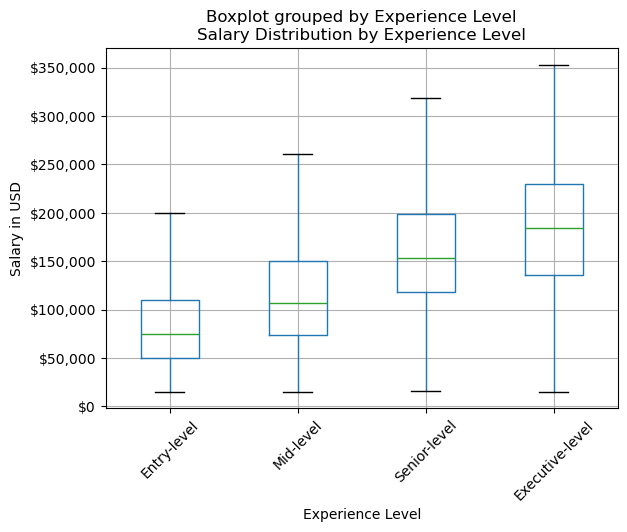

In [16]:
# Create a box plot of salary_in_usd for each experience_level category, excluding outliers
df['Experience Level'] = pd.Categorical(df['Experience Level'], categories=['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'], ordered=True)
df.boxplot(column='Salary in USD', by='Experience Level', showfliers=False)

# Add labels and title
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Salary Distribution by Experience Level')
plt.xticks(rotation=45)

# Get the current axes object from the pandas boxplot
ax = plt.gca()

# Get the current y-tick values
y_ticks = ax.get_yticks()

# Format the y-tick values as dollars
formatted_y_ticks = [f'${int(tick):,}' for tick in y_ticks]

# Update the y-ticks with the formatted values
ax.set_yticklabels(formatted_y_ticks)

# Display the plot
plt.show()

We created a boxplot grouped by Experience Level to show the minimum, maximum, median, and interquartile range for salaries across all countries and job titles. We see that the minimums for all experience levels are about the same, while the maximums show linear growth from Entry-level to Executive-level. We also see the interquartile range for Entry-level is the shortest range and Executive-level has the largest range. Also the medians for Entry-level, Mid-level, and Senior-level are skewed more toward the minimum, whereas the median for Executive-level is closest to the middle of the interquartile range and overall range.